## Observations and Insights 

# Observations:

#1: Capomulin and Ramicane have the lowest variance among other types of treatments. That means that these two 
treatments have the least amount of variability among other treatments. Both mice in Capomulin and Ramicane are 
responding similarly to the treatment. 

#2: There are no outliers in the data set for the average mean of Capomulin, Ramicane, Infubinol, and Ceftamin. That 
means that there is no data that would skew the mean or median which would result in a uniform distribution.

#3: The correlation coefficient between mouse weight and average tumor siez is 0.841936342469471. This means that both varaibles are positively correlated with one another.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_data_df=pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
mice_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = len(mice_data_df)
number_of_mice

1893

In [3]:
number_of_mice = mice_data_df['Mouse ID'].unique()
len(number_of_mice)

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
group_mice = mice_data_df.groupby('Drug Regimen')
duplicate_mice_df = group_mice[['Timepoint']].count()
duplicate_mice_df

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.  
#mice_data_df.sort_values("Mouse ID", inplace = True) 
clean_data_df = mice_data_df.drop_duplicates(subset = 'Mouse ID', keep = 'last') 
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [7]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(clean_data_df)

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Making a table with only Tumor Volume and Drug Regimen 
tumor_volume = clean_data_df[['Tumor Volume (mm3)','Drug Regimen']]
regimen_df = tumor_volume.groupby('Drug Regimen')

#Taking the mean of tumor volume 
tumor_mean = regimen_df.mean()

#Taking the median of tumor volume 
tumor_median = regimen_df.median()

#Merging into one summary table 
sum_data_df = pd.merge(tumor_mean, tumor_median, on='Drug Regimen', how='outer')

sum_data_df = sum_data_df.rename(columns={"Tumor Volume (mm3)_x" : "Mean", "Tumor Volume (mm3)_y" : "Median"})

#Taking the Variance of tumor volume 
tumor_var = regimen_df.var()

#Taking the Standard Deviation of tumor volume 
tumor_std = regimen_df.std()

#Merging into summary table
sum_data_df = pd.merge(sum_data_df, tumor_var, on='Drug Regimen', how='outer')
sum_data_df = pd.merge(sum_data_df, tumor_std, on='Drug Regimen', how='outer')

#Renaming the Columns 
sum_data_df = sum_data_df.rename(columns={"Tumor Volume (mm3)_x" : "Variance", "Tumor Volume (mm3)_y" : "Standard Deviation"})

#Taking the SEM of tumor volume 
tumor_sem = regimen_df.sem()

#Merging into one summary table 
sum_data_df = pd.merge(sum_data_df, tumor_sem, on='Drug Regimen', how='outer')
sum_data_df = sum_data_df.rename(columns={"Tumor Volume (mm3)" : "SEM"})

#Final Summary Table 
final_sum_data_df = sum_data_df.reset_index()
final_sum_data_df


,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
1,Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
2,Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
3,Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
4,Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
5,Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
6,Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
7,Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
8,Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056
9,Zoniferol,59.181258,61.840058,76.862027,8.767099,1.753420


## Bar and Pie Charts

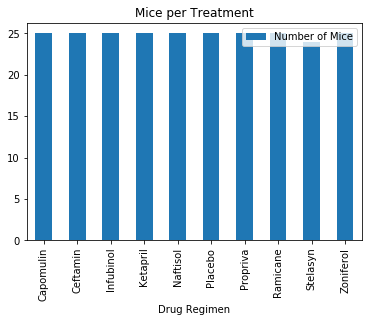

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_df = clean_data_df.groupby('Drug Regimen')
number_of_mice_df = mice_per_df.count()
number_of_mice_df = number_of_mice_df['Mouse ID']

#Merging count with sum data and eliminating the index
mice_df = pd.merge(sum_data_df, number_of_mice_df, on = 'Drug Regimen') 

#Resetting the Index
mice_df = mice_df.reset_index()

#Renaming the columns 
mice_df = mice_df.rename(columns={'Mouse ID':'Number of Mice'})

#Setting the x values to a value 
x_values = mice_df['Drug Regimen']

#Setting the y values to a value 
y_values = mice_df['Number of Mice']

#Making Bar Plot 
mice_df.plot(x = 'Drug Regimen', y = 'Number of Mice', kind='bar', title= 'Mice per Treatment')


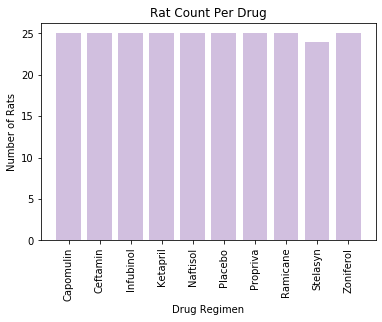

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(0, len(x_values))

#Making a list named tick locations 
tick_locations = []

#Making a list and adding to it 
for x in x_axis:
    tick_locations.append(x)

#Making the y values a list 
y_axis = list(y_values)

#Giving names to x and y axis and titile 
plt.title('Rat Count Per Drug')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rats')

#Making the bar plot 
plt.bar(x_axis, y_axis, facecolor = 'indigo', alpha= 0.25, align= 'center')
plt.xticks(tick_locations, x_values, rotation = 'vertical')
plt.show()

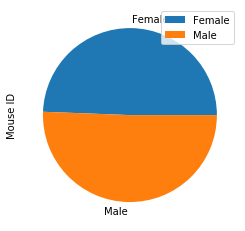

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Grouping by the sex of the mouse
sex_group_df = mice_data_df.groupby('Sex')

#Getting the amount of male and female mice 
sex_group_count = sex_group_df.count()

#Resetting the index
sex_group_df = sex_group_count.reset_index()

#Making the Pie Chart 
sex_group_count.plot(x = 'Sex', y = 'Mouse ID', kind='pie')


(-1.1046567928362272,
 1.1022210380848285,
 -1.1077121695699783,
 1.2101537272442933)

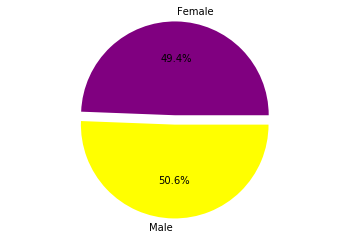

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Counting the number of male and female mice 
sex_count = sex_group_df['Mouse ID']
gender = sex_group_df['Sex']

#Setting the variables for the pie chart
color = ['purple','yellow']
explode = [0.1,0]

#Making the pie chart 
plt.pie(sex_count, explode=explode, labels=gender, colors=color, autopct = '%1.1f%%')
plt.axis('equal')

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_treatments_df = clean_data_df.loc[(clean_data_df['Drug Regimen'] == 'Capomulin')]
ramicane_treatments_df = clean_data_df.loc[(clean_data_df['Drug Regimen'] == 'Ramicane')] 
infubinol_treatments_df = clean_data_df.loc[(clean_data_df['Drug Regimen'] == 'Infubinol')] 
ceftamin_treatments_df = clean_data_df.loc[(clean_data_df['Drug Regimen'] == 'Ceftamin')]

#Making a list for Capomulin 
capomulin_tumor_volume_list = list(capomulin_treatments_df['Tumor Volume (mm3)'])
capomulin_tumor_volume_column = capomulin_treatments_df['Tumor Volume (mm3)']

#Making a list for Ramicane 
ramicane_tumor_volume_list = list(ramicane_treatments_df['Tumor Volume (mm3)'])
ramicane_tumor_volume_column = ramicane_treatments_df['Tumor Volume (mm3)']

#Making a list for Infubinol
infubinol_tumor_volume_list = list(infubinol_treatments_df['Tumor Volume (mm3)'])
infubinol_tumor_volume_column = infubinol_treatments_df['Tumor Volume (mm3)']

#Making a list for Ceftamin 
ceftamin_tumor_volume_list = list(ceftamin_treatments_df['Tumor Volume (mm3)'])
ceftamin_tumor_volume_column = ceftamin_treatments_df['Tumor Volume (mm3)']

The lower quartile of tumor volume is 32.37735684
The upper quartile of tumor volume is 40.1592203
The IQR of tumor volume is 7.781863460000004
Values below 20.70456164999999 could be outliers
Values above 51.83201549 could be outliers


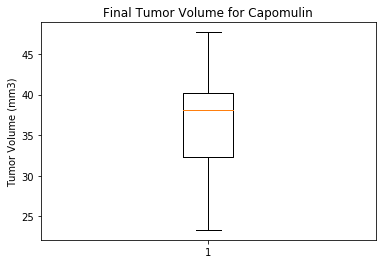

In [32]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes

#Setting quartiles 
quartiles = capomulin_tumor_volume_column.quantile([.25, .5, .75])

#Finding upper and lower quartiles 
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

#Calculating the upper and lower bound 
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

# add subset 
#Printing the lower and upper limits and where outliers would be on the list 
print(f'The lower quartile of tumor volume is {lowerq}')
print(f'The upper quartile of tumor volume is {upperq}')
print(f'The IQR of tumor volume is {iqr}')
print(f'Values below {lower_bound} could be outliers')
print(f'Values above {upper_bound} could be outliers')

#Plotting the box and whisker plot 
figl, axl = plt.subplots()
axl.set_title('Final Tumor Volume for Capomulin')
axl.set_ylabel('Tumor Volume (mm3)')
axl.boxplot(tumor_volume_list)
plt.show()

The lower quartile of tumor volume is 31.56046955
The upper quartile of tumor volume is 40.65900627
The IQR of tumor volume is 9.098536719999998
Values below 17.912664470000003 could be outliers
Values above 54.30681135 could be outliers


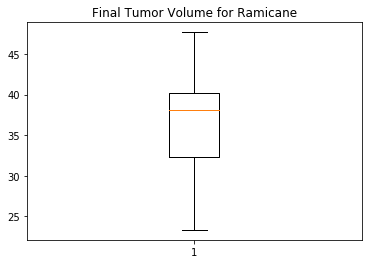

In [30]:
#Setting quartiles 
quartiles = ramicane_tumor_volume_column.quantile([.25, .5, .75])

#Finding upper and lower quartiles 
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

#Calculating the upper and lower bound 
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

# add subset 
#Printing the lower and upper limits and where outliers would be on the list 
print(f'The lower quartile of tumor volume is {lowerq}')
print(f'The upper quartile of tumor volume is {upperq}')
print(f'The IQR of tumor volume is {iqr}')
print(f'Values below {lower_bound} could be outliers')
print(f'Values above {upper_bound} could be outliers')

#Plotting the box and whisker plot 
figl, axl = plt.subplots()
axl.set_title('Final Tumor Volume for Ramicane')
axl.boxplot(tumor_volume_list)
plt.show()

The lower quartile of tumor volume is 54.04860769
The upper quartile of tumor volume is 65.52574285
The IQR of tumor volume is 11.477135160000003
Values below 36.83290494999999 could be outliers
Values above 82.74144559000001 could be outliers


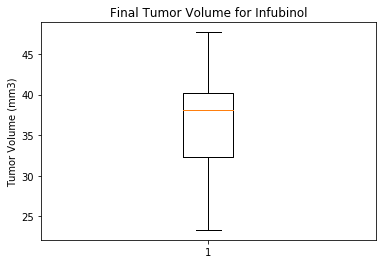

In [29]:
#Setting quartiles 
quartiles = infubinol_tumor_volume_column.quantile([.25, .5, .75])

#Finding upper and lower quartiles 
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

#Calculating the upper and lower bound 
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

# add subset 
#Printing the lower and upper limits and where outliers would be on the list 
print(f'The lower quartile of tumor volume is {lowerq}')
print(f'The upper quartile of tumor volume is {upperq}')
print(f'The IQR of tumor volume is {iqr}')
print(f'Values below {lower_bound} could be outliers')
print(f'Values above {upper_bound} could be outliers')

#Plotting the box and whisker plot 
figl, axl = plt.subplots()
axl.set_title('Final Tumor Volume for Infubinol')
axl.set_ylabel('Tumor Volume (mm3)')
axl.boxplot(tumor_volume_list)
plt.show()

The lower quartile of tumor volume is 48.72207785
The upper quartile of tumor volume is 64.29983003
The IQR of tumor volume is 15.577752179999997
Values below 25.355449580000002 could be outliers
Values above 87.66645829999999 could be outliers


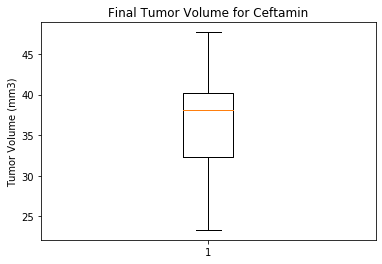

In [28]:
#Setting quartiles 
quartiles = ceftamin_tumor_volume_column.quantile([.25, .5, .75])

#Finding upper and lower quartiles 
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

#Calculating the upper and lower bound 
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

# add subset 
#Printing the lower and upper limits and where outliers would be on the list 
print(f'The lower quartile of tumor volume is {lowerq}')
print(f'The upper quartile of tumor volume is {upperq}')
print(f'The IQR of tumor volume is {iqr}')
print(f'Values below {lower_bound} could be outliers')
print(f'Values above {upper_bound} could be outliers')

#Plotting the box and whisker plot 
figl, axl = plt.subplots()
axl.set_title('Final Tumor Volume for Ceftamin')
axl.set_ylabel('Tumor Volume (mm3)')
axl.boxplot(tumor_volume_list)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = mice_data_df.loc[(mice_data_df['Drug Regimen'] == 'Capomulin')]
b128_df = capomulin_df.loc[(capomulin_df['Mouse ID'] == 'b128')]
time = np.arange(0, 50, 5)

#Finding the x and y values 
timepoint = b128_df[['Timepoint']]
tumor_volume = b128_df[['Tumor Volume (mm3)']]

#Making the scatter plot
tumor_volume, = plt.plot(time, tumor_volume, marker="o", color = 'orange', label = 'Tumor Volume (mm3)')

#Adding lables and titles 
plt.title('Tumor Volume Over Time')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

#Setting Limits
plt.xlim(0,45)
plt.ylim(0,70)

#Setting a legend 
plt.legend(handles=[tumor_volume], loc='best')

#Adding a grid
plt.grid()

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#Finding the average of the tumor volume over time 
mouse_id_df = capomulin_df.groupby('Mouse ID')
average_tumor_df = mouse_id_df.mean()

#Finding the x and y variables 
average_tumor = average_tumor_df['Tumor Volume (mm3)']
weight = average_tumor_df['Weight (g)']

#Making the scatter plot
plt.scatter(weight, average_tumor, marker = 'o', facecolors = 'purple', edgecolors = 'yellow')

#Giving names to labels
plt.title('Weight v Tumor Size')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

#Setting Limits
plt.xlim(10,28)
plt.ylim(0,50)
plt.grid()

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept,  rvalue, pvalue, stderr) = sts.linregress(weight, average_tumor)
lin_reg = ('y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2)))
lin_reg

In [ ]:
correlation = np.corrcoef(average_tumor, weight, rowvar=True)
correlation_coefficient = correlation[0][1]
correlation_coefficient 

In [ ]:
#Making the scatter plot
plt.scatter(weight, average_tumor, marker = 'o', facecolors = 'purple', edgecolors = 'yellow')

#Giving names to labels
plt.title('Weight v Tumor Size')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

#Setting Limits
plt.xlim(14,26)
plt.ylim(0,50)

#Plotting the regression line
x_values = weight
regress_values = x_values * slope + intercept 
plt.plot(x_values, regress_values, 'r-')
plt.grid()